In [24]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

# Perimeter_data
perimeter_data = data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]
diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding sex
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

# Data normalization
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#perimeter_data = pd.DataFrame(x_scaled)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9166666666666666

[]

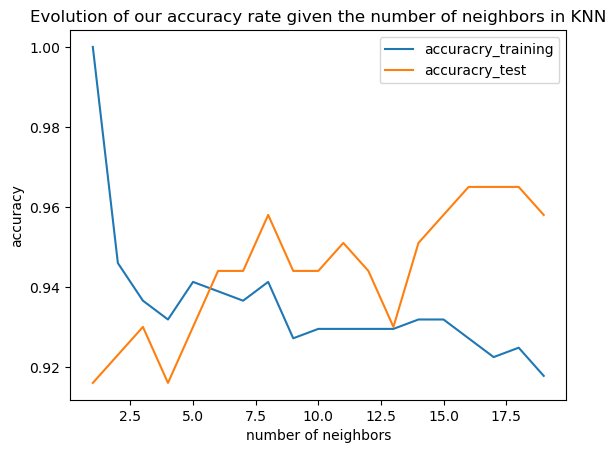

In [33]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')

#Null value
#Data types
#Explain why I choose my columns
# Perimeter_data
perimeter_data = data[['diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst']]
diagnosis = pd.get_dummies(perimeter_data['diagnosis'], drop_first=True) #One hot encoding sex
perimeter_data = pd.concat([perimeter_data, diagnosis], axis=1)
perimeter_data.drop(columns= ["diagnosis"], axis=1,inplace=True)

# Data normalization ? What is
#x = perimeter_data.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#perimeter_data = pd.DataFrame(x_scaled)

y = perimeter_data["M"]
X = perimeter_data.drop(columns=["M"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

hyperparam = [i for i in range(1,20)]
accuracy_training = []
accuracy_test = []

for k in hyperparam:
    #Training set
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_training.append(accuracy_score(y_train, y_pred))
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    
plt.plot(hyperparam, accuracy_training, label = "accuracry_training" )
plt.plot(hyperparam, accuracy_test, label = "accuracry_test" )
plt.title("Evolution of our accuracy rate given the number of neighbors in KNN")
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.plot()